In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Example: Read and combine datasets
years = [2020, 2021, 2022, 2023, 2024]
dataframes = []

for year in years:
    df = pd.read_csv(f'{year}/SurfSpot_SST(Daily Mean {year}).csv')  # Replace with your file paths
    df['Year'] = year
    dataframes.append(df)

# Combine all data into one DataFrame
combined_df = pd.concat(dataframes)

In [3]:
# Ensure Date is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the month from the Date
combined_df['Month'] = combined_df['Date'].dt.month

# Group by Surf Spot, Year, and Month and calculate average SST
grouped_data = combined_df.groupby(['Surf Spot', 'Year', 'Month'])['SST (°C)'].mean().reset_index()

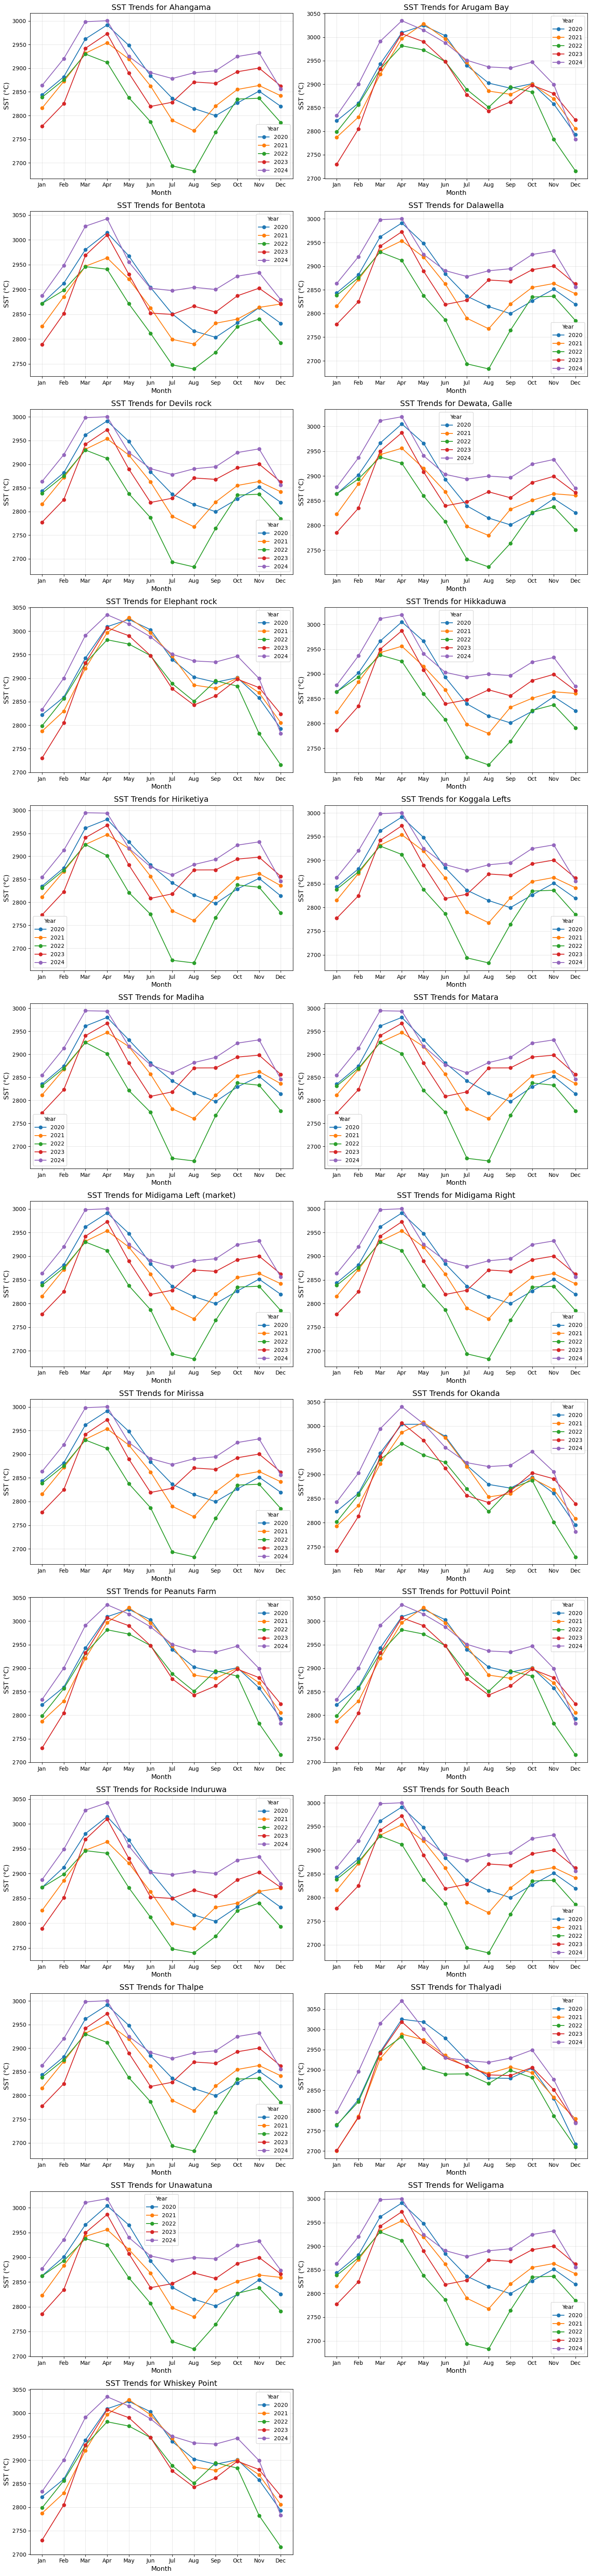

In [4]:
# Get the unique surf spots
surf_spots = grouped_data['Surf Spot'].unique()

# Plot separate graphs for each surf spot
num_spots = len(surf_spots)
cols = 2  # Number of columns in the subplot grid
rows = (num_spots + cols - 1) // cols  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

for i, spot in enumerate(surf_spots):
    ax = axes[i]
    spot_data = grouped_data[grouped_data['Surf Spot'] == spot]
    for year in years:
        year_data = spot_data[spot_data['Year'] == year]
        ax.plot(year_data['Month'], year_data['SST (°C)'], marker='o', label=f'{year}')
    
    ax.set_title(f'SST Trends for {spot}', fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('SST (°C)', fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels([
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend(title='Year')
    ax.grid(alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()